### **Import library**

In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Data manipulation
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn.metrics import (classification_report, confusion_matrix, 
                              accuracy_score, roc_auc_score, roc_curve,
                              precision_recall_curve)

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("All libraries imported successfully!")

All libraries imported successfully!


# Customer Churn Prediction

## Pendahuluan
Dataset yang kami gunakan merupakan dataset customer churn dari bank ABC. **Churn** means when customers leave the bank. Our goal is to predict which customers might leave so the bank can take action to retain them.

### Tahapan :
- Input Data
- Explore data (EDA)
- Data Preprocessing (clean and prepare data)
- Build a machine learning model
- Evaluate model performance

### Dataset Overview:
- **10 input features**: credit_score, country, gender, age, tenure, balance, products_number, credit_card, active_member, estimated_salary
- **1 target variable**: churn (label : 1 = Berhenti, 0 = Tetap aktif)


---

## Section 2: Input dan informasi data


Pada dataset customer churn yang kami ambil dari sumber kaggle ini, kami potong data 1% dari data awal untuk data validasi model nantinya. 

Data validasi ini diambil 10 data dari sekitar 1000 data yang telah dipotong.

In [28]:
# Load the dataset
df = pd.read_csv("Bank Customer Churn Prediction.csv")

# Display basic information
print(f"\nDataset Shape: {df.shape[0]} rows × {df.shape[1]} columns\n")

from IPython.display import HTML
HTML(df.head().to_html())


Dataset Shape: 9990 rows × 12 columns



,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [29]:
# Show data types
print("\nData Types:")
print(df.dtypes)

# Show column names
print("\nColumn Names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")


Data Types:
customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

Column Names:
1. customer_id
2. credit_score
3. country
4. gender
5. age
6. tenure
7. balance
8. products_number
9. credit_card
10. active_member
11. estimated_salary
12. churn


---

## Section 3: Understanding Data Types

Beberapa atribut pada dataset kami yaitu sebagai berikut :

| Column | Type | Description |
|--------|------|-------------|
| customer_id | Identifier | Unique ID (won't use for prediction) |
| credit_score | Numeric | Customer's credit score (300-850) |
| country | Categorical | France, Spain, or Germany |
| gender | Categorical | Male or Female |
| age | Numeric | Customer's age |
| tenure | Numeric | Years with the bank |
| balance | Numeric | Account balance |
| products_number | Numeric | Number of bank products |
| credit_card | Binary | Has credit card? (1=Yes, 0=No) |
| active_member | Binary | Is active? (1=Yes, 0=No) |
| estimated_salary | Numeric | Annual salary estimate |
| churn | Target | Left the bank? (1=Yes, 0=No) |

In [30]:
print("=" * 70)
print("Ringkasan Informasi Statistik Data:")
print("=" * 70)

# Summary statistics
print("\nDeskripsi statistik:")
print(df.describe().round(2))
df.describe().round(2)

# Check for missing values
print("\nMissing Values Check:")
missing = df.isnull().sum()
print(missing)

if missing.sum() == 0:
    print("\nTidak ada missing values pada dataset ini.")
else:
    print(f"\nTotal missing values: {missing.sum()}")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")

Ringkasan Informasi Statistik Data:

Deskripsi statistik:
       customer_id  credit_score      age   tenure    balance  \
count      9990.00       9990.00  9990.00  9990.00    9990.00   
mean   15690972.95        650.48    38.92     5.01   76508.29   
std       71922.22         96.65    10.49     2.89   62400.81   
min    15565701.00        350.00    18.00     0.00       0.00   
25%    15628587.25        584.00    32.00     3.00       0.00   
50%    15690758.00        652.00    37.00     5.00   97258.33   
75%    15753243.25        717.00    44.00     7.75  127647.84   
max    15815690.00        850.00    92.00    10.00  250898.09   

       products_number  credit_card  active_member  estimated_salary   churn  
count          9990.00      9990.00        9990.00           9990.00  9990.0  
mean              1.53         0.71           0.52         100101.71     0.2  
std               0.58         0.46           0.50          57514.02     0.4  
min               1.00         0.00     

In [31]:
from IPython.display import HTML
#df = df.drop(columns=['customer_id'])
HTML(df.describe().round(2).to_html())


,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,9990.00,9990.00,9990.00,9990.00,9990.00,9990.00,9990.00,9990.00,9990.00,9990.0
mean,15690972.95,650.48,38.92,5.01,76508.29,1.53,0.71,0.52,100101.71,0.2
std,71922.22,96.65,10.49,2.89,62400.81,0.58,0.46,0.50,57514.02,0.4
min,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0
25%,15628587.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51012.47,0.0
50%,15690758.00,652.00,37.00,5.00,97258.33,1.00,1.00,1.00,100238.11,0.0
75%,15753243.25,717.00,44.00,7.75,127647.84,2.00,1.00,1.00,149395.88,0.0
max,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


---

## Section 4: Exploratory Data Analysis (EDA)

EDA membantu kami memahami pola data pada dataset. Visualisasi data yang dapat dibuat yaitu :
- Distribusi customers churned vs stayed
- Atribut/Fitur yang berhubungan dengan Kelas/label churn
- Distribusi dari variabel berbeda

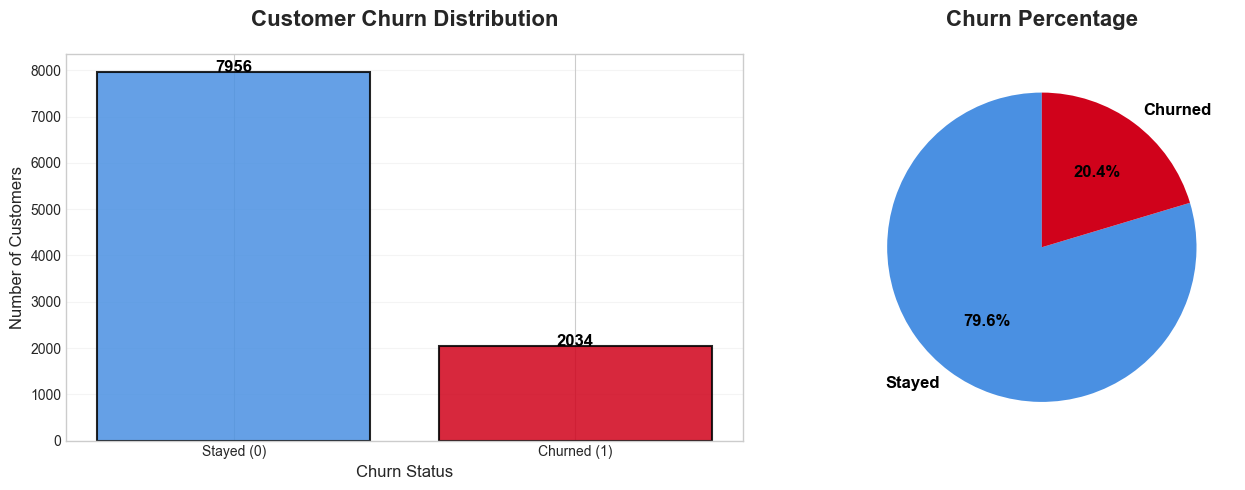

In [32]:
# Style: Soft Blue Professional
plt.style.use('seaborn-v0_8-whitegrid')

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Colors
bar_colors = ['#4a90e2', '#d0021b']     # biru lembut & merah elegan
pie_colors = ['#4a90e2', '#d0021b']

# Churn counts
churn_counts = df['churn'].value_counts()
axes[0].bar(['Stayed (0)', 'Churned (1)'], churn_counts.values,
            color=bar_colors, alpha=0.85, edgecolor='black', linewidth=1.5)
axes[0].set_title('Customer Churn Distribution', fontsize=16, fontweight='bold', pad=20)
axes[0].set_ylabel('Number of Customers', fontsize=12)
axes[0].set_xlabel('Churn Status', fontsize=12)
axes[0].grid(axis='y', alpha=0.2)

# Add value labels
for i, v in enumerate(churn_counts.values):
    axes[0].text(i, v + 1, str(v), ha='center', fontweight='bold', fontsize=12, color='black')

# Churn percentage
churn_pct = df['churn'].value_counts(normalize=True) * 100
axes[1].pie(churn_pct, labels=['Stayed', 'Churned'], autopct='%1.1f%%',
            colors=pie_colors, startangle=90,
            textprops={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'})
axes[1].set_title('Churn Percentage', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('1_churn_distribution_blue.png', dpi=300, bbox_inches='tight')
plt.show()


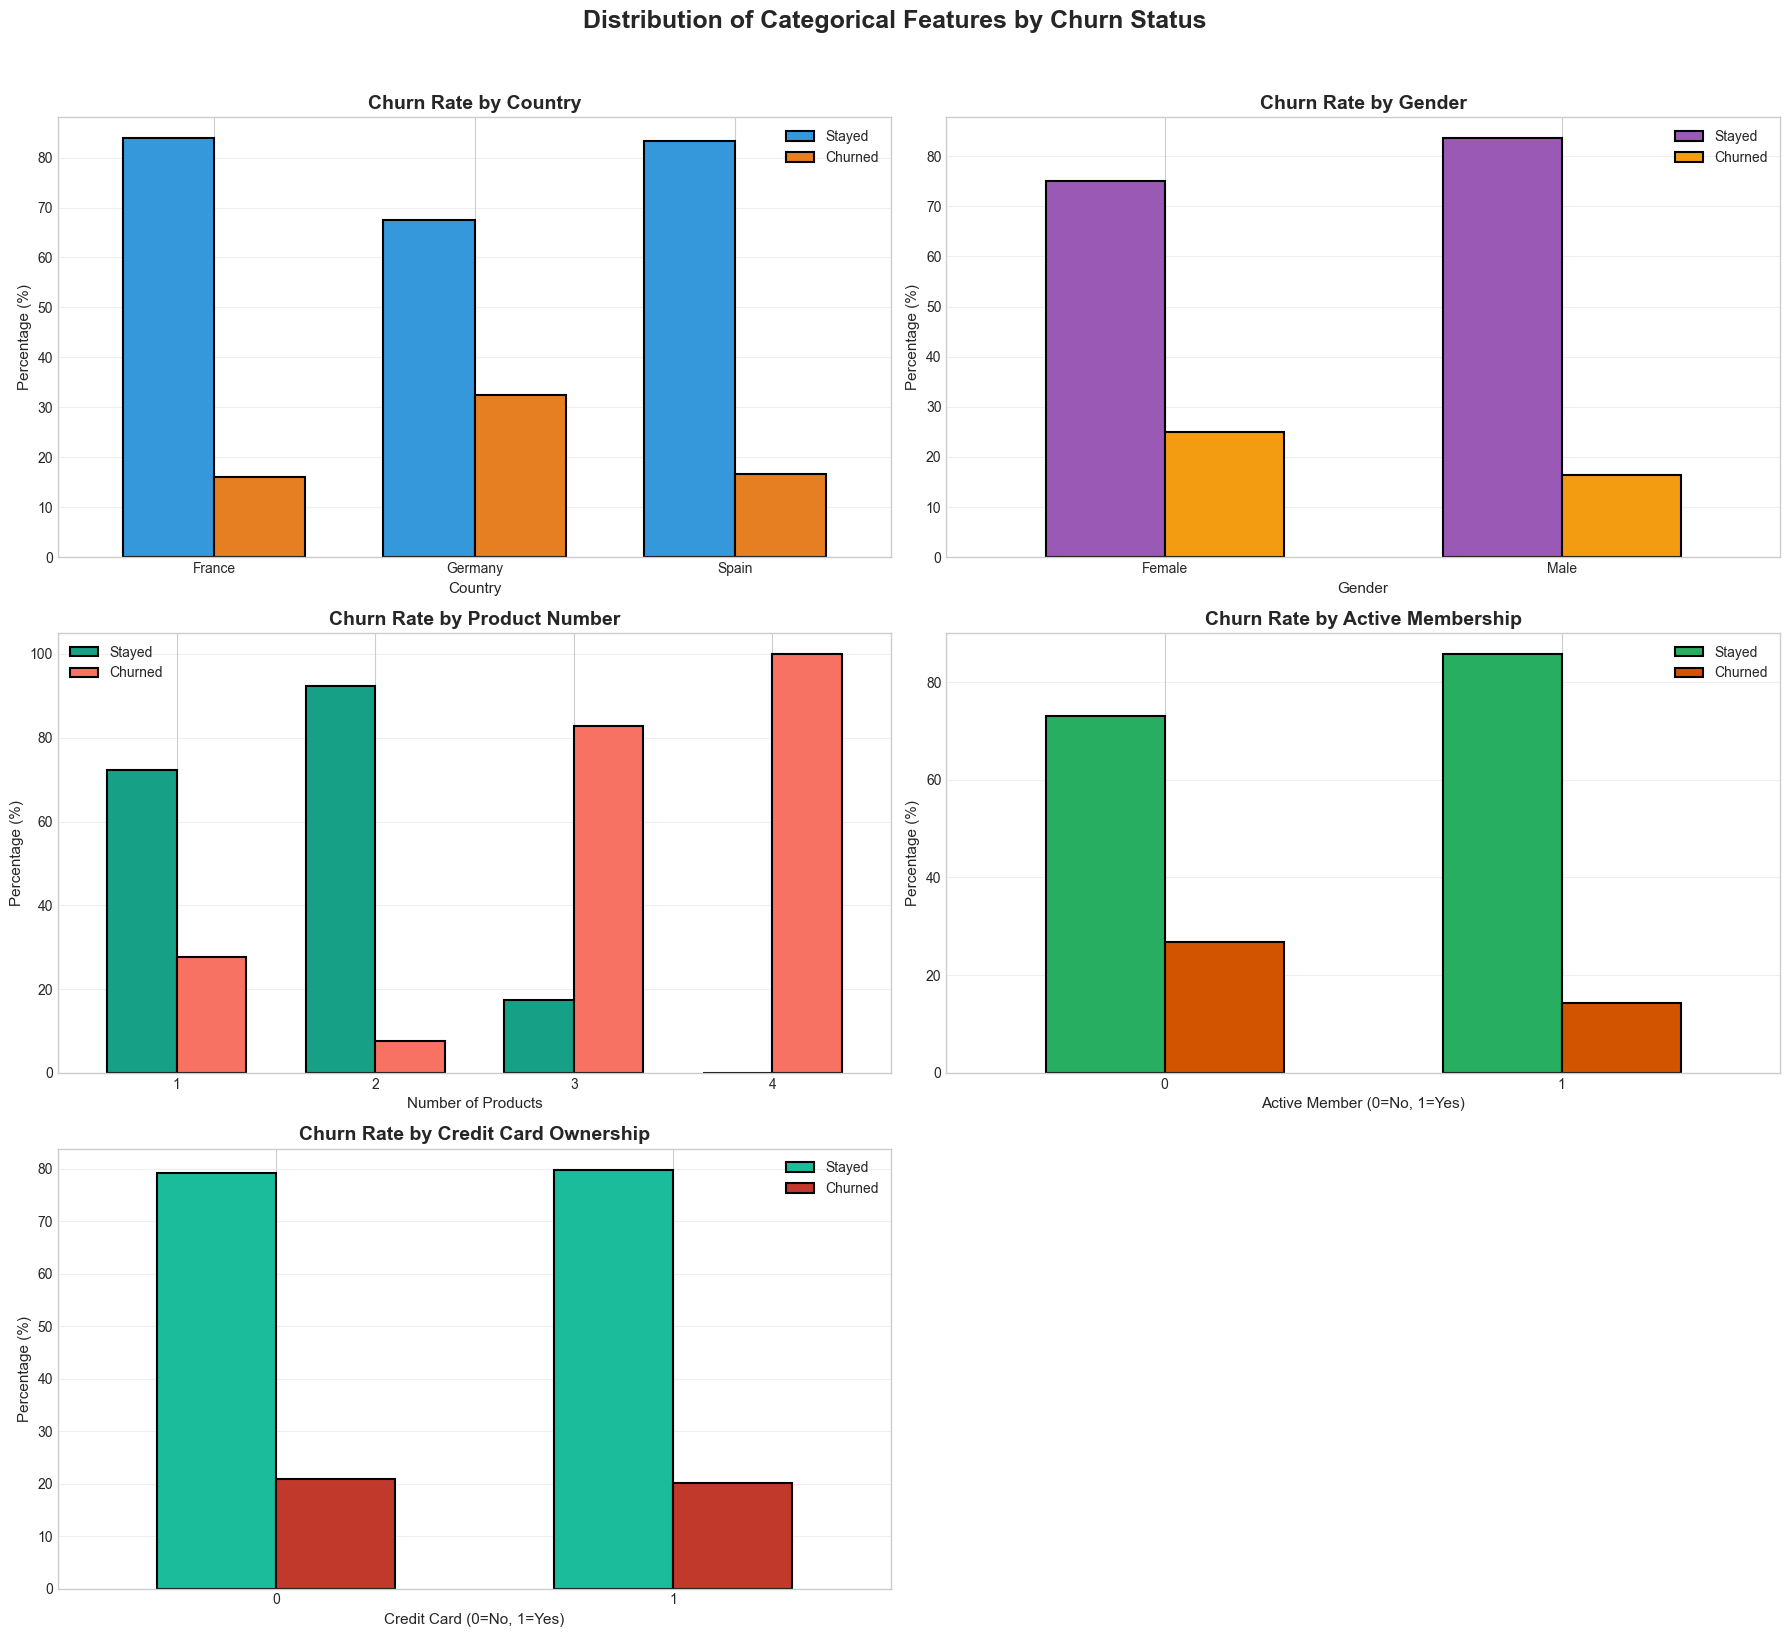

In [33]:
plt.style.use('seaborn-v0_8-bright')

fig, axes = plt.subplots(3, 2, figsize=(18, 16))

# --- 1. Churn by Country ---
country_churn = pd.crosstab(df['country'], df['churn'], normalize='index') * 100
country_churn.plot(kind='bar', ax=axes[0, 0],
                   color=['#3498db', '#e67e22'],
                   width=0.7, edgecolor='black', linewidth=1.5)

axes[0, 0].set_title('Churn Rate by Country', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Country', fontsize=11)
axes[0, 0].set_ylabel('Percentage (%)', fontsize=11)
axes[0, 0].legend(['Stayed', 'Churned'])
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=0)
axes[0, 0].grid(axis='y', alpha=0.3)


# --- 2. Churn by Gender ---
gender_churn = pd.crosstab(df['gender'], df['churn'], normalize='index') * 100
gender_churn.plot(kind='bar', ax=axes[0, 1],
                  color=['#9b59b6', '#f39c12'],
                  width=0.6, edgecolor='black', linewidth=1.5)

axes[0, 1].set_title('Churn Rate by Gender', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Gender', fontsize=11)
axes[0, 1].set_ylabel('Percentage (%)', fontsize=11)
axes[0, 1].legend(['Stayed', 'Churned'])
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)
axes[0, 1].grid(axis='y', alpha=0.3)


# --- 3. Churn by Number of Products ---
products_churn = pd.crosstab(df['products_number'], df['churn'], normalize='index') * 100
products_churn.plot(kind='bar', ax=axes[1, 0],
                    color=['#16a085', "#f77263"],
                    width=0.7, edgecolor='black', linewidth=1.5)

axes[1, 0].set_title('Churn Rate by Product Number', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Number of Products', fontsize=11)
axes[1, 0].set_ylabel('Percentage (%)', fontsize=11)
axes[1, 0].legend(['Stayed', 'Churned'])
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=0)
axes[1, 0].grid(axis='y', alpha=0.3)


# --- 4. Churn by Active Membership ---
active_churn = pd.crosstab(df['active_member'], df['churn'], normalize='index') * 100
active_churn.plot(kind='bar', ax=axes[1, 1],
                  color=['#27ae60', '#d35400'],
                  width=0.6, edgecolor='black', linewidth=1.5)

axes[1, 1].set_title('Churn Rate by Active Membership', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Active Member (0=No, 1=Yes)', fontsize=11)
axes[1, 1].set_ylabel('Percentage (%)', fontsize=11)
axes[1, 1].legend(['Stayed', 'Churned'])
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0)
axes[1, 1].grid(axis='y', alpha=0.3)


# --- 5. Churn by Credit Card ---
cc_churn = pd.crosstab(df['credit_card'], df['churn'], normalize='index') * 100
cc_churn.plot(kind='bar', ax=axes[2, 0],
              color=['#1abc9c', '#c0392b'],
              width=0.6, edgecolor='black', linewidth=1.5)

axes[2, 0].set_title('Churn Rate by Credit Card Ownership', fontsize=14, fontweight='bold')
axes[2, 0].set_xlabel('Credit Card (0=No, 1=Yes)', fontsize=11)
axes[2, 0].set_ylabel('Percentage (%)', fontsize=11)
axes[2, 0].legend(['Stayed', 'Churned'])
axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=0)
axes[2, 0].grid(axis='y', alpha=0.3)


# Slot terakhir (axes[2,1]) dibiarkan kosong atau bisa dihapus
axes[2, 1].axis('off')


fig.suptitle('Distribution of Categorical Features by Churn Status',
             fontsize=18, fontweight='bold', y=1.02)

plt.tight_layout()
plt.savefig('2_categorical_analysis_full.png', dpi=300, bbox_inches='tight')
plt.show()


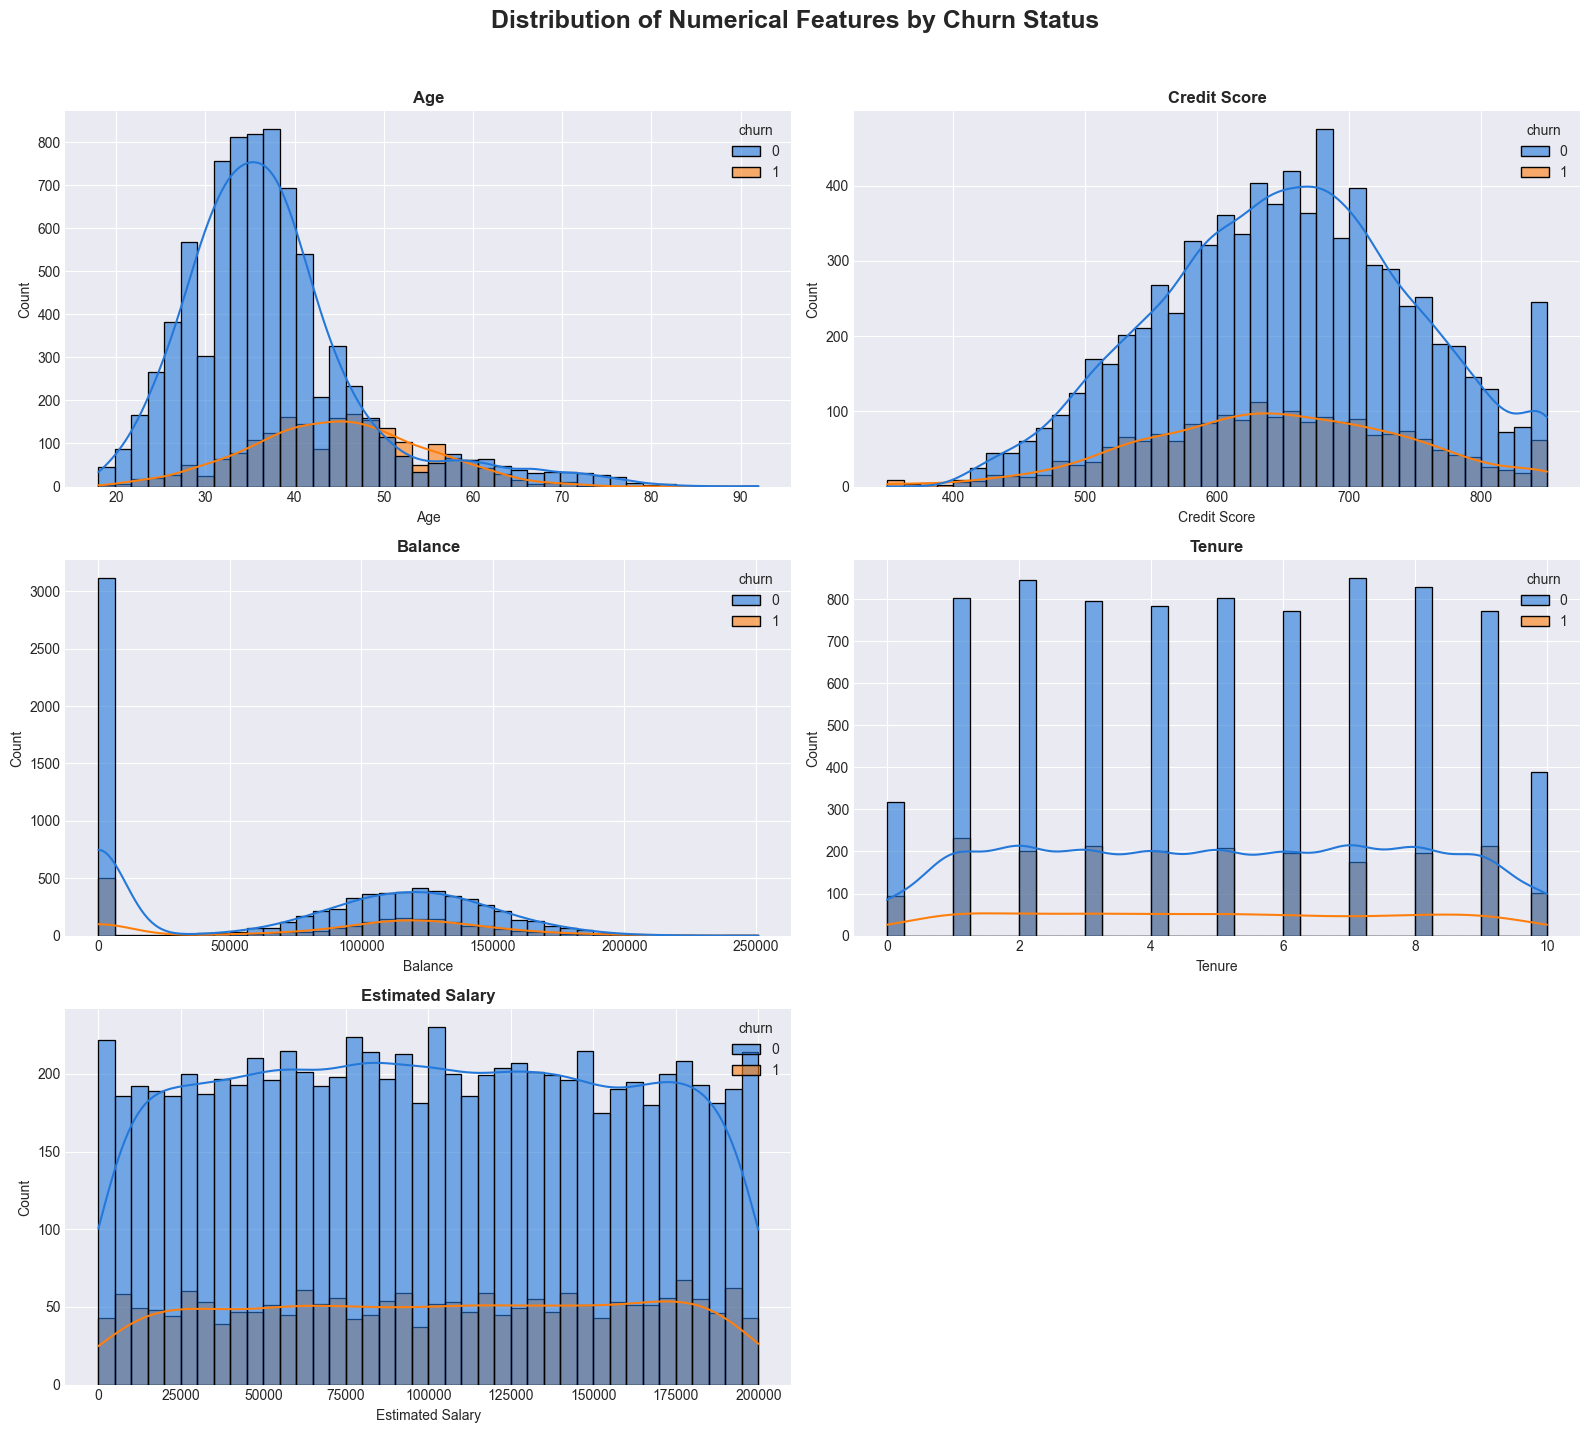

In [34]:
plt.style.use('seaborn-v0_8-darkgrid')

# 3 baris, 2 kolom
fig, axes = plt.subplots(3, 2, figsize=(16, 14))
fig.suptitle('Distribution of Numerical Features by Churn Status',
             fontsize=18, fontweight='bold', y=1.02)

numerical_features = [
    'age',
    'credit_score',
    'balance',
    'tenure',
    'estimated_salary'
]

for idx, feature in enumerate(numerical_features):
    row = idx // 2
    col = idx % 2
    
    sns.histplot(
        data=df,
        x=feature,
        hue='churn',
        kde=True,
        bins=40,
        ax=axes[row, col],
        alpha=0.6,
        palette=["#2378d9", '#ff7f0e']  # biru & oranye
    )

    axes[row, col].set_title(
        feature.replace('_', ' ').title(),
        fontsize=12, fontweight='bold'
    )
    axes[row, col].set_xlabel(feature.replace('_', ' ').title(), fontsize=10)
    axes[row, col].set_ylabel('Count', fontsize=10)

# Matikan slot terakhir: axes[2,1]
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()


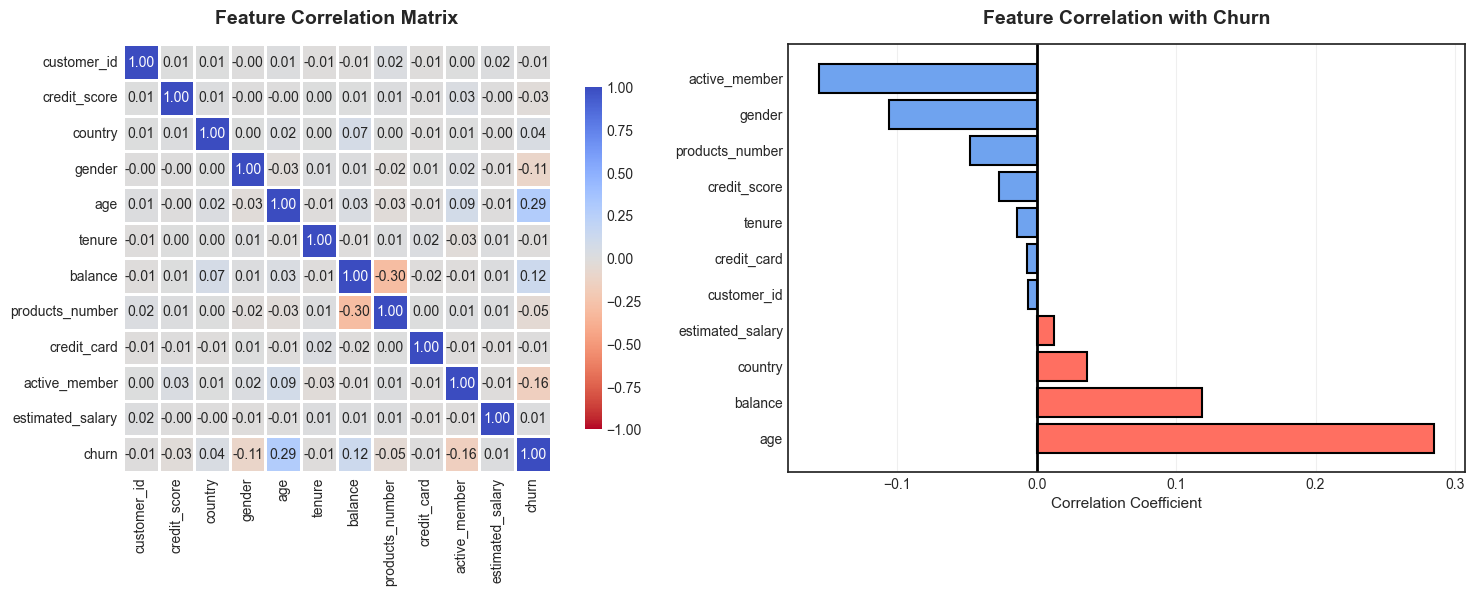


Top 5 Features Correlated with Churn:
age                 0.285112
balance             0.118747
country             0.036142
estimated_salary    0.012424
customer_id        -0.006360
Name: churn, dtype: float64


In [35]:
plt.style.use('seaborn-v0_8-white')

# Encode categorical for correlation
df_corr = df.copy()
df_corr['gender'] = LabelEncoder().fit_transform(df_corr['gender'])
df_corr['country'] = LabelEncoder().fit_transform(df_corr['country'])

correlation_with_churn = df_corr.corr()['churn'].sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1) Full correlation heatmap
sns.heatmap(
    df_corr.corr(), annot=True, fmt='.2f',
    cmap='coolwarm_r',      # warna baru
    center=0, square=True, linewidths=1,
    cbar_kws={"shrink": 0.8},
    ax=axes[0], vmin=-1, vmax=1
)
axes[0].set_title('Feature Correlation Matrix',
                  fontsize=14, fontweight='bold', pad=15)

# 2) Correlation with churn 
colors_bar = [
    '#ff6f61' if x > 0 else '#6fa3ef'     # soft salmon vs soft blue
    for x in correlation_with_churn.drop('churn').values
]

axes[1].barh(
    range(len(correlation_with_churn) - 1),
    correlation_with_churn.drop('churn').values,
    color=colors_bar, edgecolor='black', linewidth=1.5
)

axes[1].set_yticks(range(len(correlation_with_churn) - 1))
axes[1].set_yticklabels(correlation_with_churn.drop('churn').index)
axes[1].set_xlabel('Correlation Coefficient', fontsize=11)
axes[1].set_title('Feature Correlation with Churn',
                  fontsize=14, fontweight='bold', pad=15)
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=2)
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('4_correlation_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nTop 5 Features Correlated with Churn:")
print(correlation_with_churn.drop('churn').head())


---

## Section 5: Key Insights from EDA

Based on our visualizations, we discovered:

### Important Findings:
1. **Churn Rate**: About 20-25% of customers have churned
2. **Age**: Older customers (45+) seem to churn more
3. **Geography**: Germany might have higher churn rates
4. **Products**: Customers with 3-4 products have unusual patterns
5. **Activity**: Inactive members are more likely to churn
6. **Balance**: High-balance customers show interesting patterns

### Why This Matters:
Understanding these patterns helps us:
- Identify at-risk customers
- Focus retention efforts
- Build better prediction models

---

## Section 6: Data Preprocessing

Before training our model, we need to prepare the data:

1. **Remove unnecessary columns** (customer_id)
2. **Encode categorical variables** (convert text to numbers)
3. **Split data** into training and testing sets
4. **Scale features** (normalize numeric values)

---

In [36]:
print("=" * 70)
print("DATA PREPROCESSING")
print("=" * 70)

# Create a copy to preserve original data
df_clean = df.copy()

# Step 1: Remove customer_id (not useful for prediction)
df_clean = df_clean.drop('customer_id', axis=1)
print("\nStep 1: Removed 'customer_id' column")

# Step 2: Encode Gender (Binary: Female=0, Male=1)
le_gender = LabelEncoder()
df_clean['gender'] = le_gender.fit_transform(df_clean['gender'])
print("Step 2: Encoded 'gender' -> Female=0, Male=1")

# Step 3: One-Hot Encode Country (Creates dummy variables)
# drop_first=True avoids multicollinearity
df_clean = pd.get_dummies(df_clean, columns=['country'], prefix='country', drop_first=True)
print("Step 3: One-hot encoded 'country'")
print(f"   New columns: {[col for col in df_clean.columns if 'country' in col]}")

# Display cleaned dataset info
print(f"\nCleaned Dataset Shape: {df_clean.shape}")
print(f"\nFinal Feature Columns ({len(df_clean.columns)-1} features):")
for i, col in enumerate([c for c in df_clean.columns if c != 'churn'], 1):
    print(f"   {i}. {col}")

DATA PREPROCESSING

Step 1: Removed 'customer_id' column
Step 2: Encoded 'gender' -> Female=0, Male=1
Step 3: One-hot encoded 'country'
   New columns: ['country_Germany', 'country_Spain']

Cleaned Dataset Shape: (9990, 12)

Final Feature Columns (11 features):
   1. credit_score
   2. gender
   3. age
   4. tenure
   5. balance
   6. products_number
   7. credit_card
   8. active_member
   9. estimated_salary
   10. country_Germany
   11. country_Spain


In [37]:
print("\n" + "=" * 70)
print("SPLITTING DATA")
print("=" * 70)

# Separate features (X) and target (y)
X = df_clean.drop('churn', axis=1)
y = df_clean['churn']

print(f"\nFeatures (X): {X.shape} → {X.shape[1]} features × {X.shape[0]} samples")
print(f"Target (y): {y.shape} → {y.shape[0]} labels")

# Split into training (80%) and testing (20%) sets
# stratify=y ensures both sets have same churn proportion
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% for testing
    random_state=42,    # For reproducibility
    stratify=y          # Maintain churn ratio
)

print(f"\nTraining Set: {X_train.shape[0]} samples ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"Testing Set: {X_test.shape[0]} samples ({X_test.shape[0]/len(df)*100:.1f}%)")

# Verify stratification worked
print(f"\nChurn Distribution Check:")
print(f"   Training: {y_train.mean()*100:.2f}% churned")
print(f"   Testing: {y_test.mean()*100:.2f}% churned")
print(f"   Original: {y.mean()*100:.2f}% churned")


SPLITTING DATA

Features (X): (9990, 11) → 11 features × 9990 samples
Target (y): (9990,) → 9990 labels

Training Set: 7992 samples (80.0%)
Testing Set: 1998 samples (20.0%)

Churn Distribution Check:
   Training: 20.36% churned
   Testing: 20.37% churned
   Original: 20.36% churned


In [38]:
print("\n" + "=" * 70)
print("FEATURE SCALING")
print("=" * 70)

# StandardScaler: transforms features to have mean=0 and std=1
# This helps models perform better and converge faster
scaler = StandardScaler()

# Fit on training data only (avoid data leakage!)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled using StandardScaler")
print("   - Mean ≈ 0")
print("   - Standard Deviation ≈ 1")

# Show example of scaling
print(f"\nExample - Credit Score before scaling:")
print(f"   Training: mean={X_train['credit_score'].mean():.2f}, std={X_train['credit_score'].std():.2f}")
print(f"\nExample - Credit Score after scaling:")
print(f"   Training: mean={X_train_scaled[:, X.columns.get_loc('credit_score')].mean():.2f}, " +
      f"std={X_train_scaled[:, X.columns.get_loc('credit_score')].std():.2f}")

print("\nData is now ready for machine learning!")


FEATURE SCALING

Features scaled using StandardScaler
   - Mean ≈ 0
   - Standard Deviation ≈ 1

Example - Credit Score before scaling:
   Training: mean=650.27, std=96.68

Example - Credit Score after scaling:
   Training: mean=0.00, std=1.00

Data is now ready for machine learning!


---

## Section 7: Model Training

We'll train **3 different models** and compare them:

1. **Logistic Regression**: Simple, interpretable baseline
2. **Decision Tree**: Easy to visualize and understand
3. **Random Forest**: Powerful ensemble method (often best performer)

---

In [39]:
print("\n" + "=" * 70)
print("MODEL TRAINING")
print("=" * 70)

# Dictionary to store models
models = {}
predictions = {}
probabilities = {}

# 1. Logistic Regression
print("\nTraining Model 1: Logistic Regression...")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
models['Logistic Regression'] = lr_model
predictions['Logistic Regression'] = lr_model.predict(X_test_scaled)
probabilities['Logistic Regression'] = lr_model.predict_proba(X_test_scaled)[:, 1]
print("Complete!")

# 2. Decision Tree
print("\nTraining Model 2: Decision Tree...")
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train_scaled, y_train)
models['Decision Tree'] = dt_model
predictions['Decision Tree'] = dt_model.predict(X_test_scaled)
probabilities['Decision Tree'] = dt_model.predict_proba(X_test_scaled)[:, 1]
print("Complete!")

# 3. Random Forest
print("\nTraining Model 3: Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, 
                                  random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)
models['Random Forest'] = rf_model
predictions['Random Forest'] = rf_model.predict(X_test_scaled)
probabilities['Random Forest'] = rf_model.predict_proba(X_test_scaled)[:, 1]
print("Complete!")

print("\nAll models trained successfully!")


MODEL TRAINING

Training Model 1: Logistic Regression...
Complete!

Training Model 2: Decision Tree...
Complete!

Training Model 3: Random Forest...
Complete!

All models trained successfully!


---

## Section 8: Model Evaluation

Now we'll evaluate how well each model performs using:
- **Accuracy**: % of correct predictions
- **Precision**: Of predicted churns, how many were correct?
- **Recall**: Of actual churns, how many did we catch?
- **ROC-AUC**: Overall model quality (0.5=random, 1.0=perfect)

---

In [40]:
print("\n" + "=" * 70)
print("MODEL EVALUATION & COMPARISON")
print("=" * 70)

# Create comparison dataframe
results = []

for model_name in models.keys():
    accuracy = accuracy_score(y_test, predictions[model_name])
    roc_auc = roc_auc_score(y_test, probabilities[model_name])
    
    results.append({
        'Model': model_name,
        'Accuracy': f"{accuracy*100:.2f}%",
        'ROC-AUC': f"{roc_auc:.4f}"
    })

results_df = pd.DataFrame(results)
print("\nModel Performance Summary:")
print(results_df.to_string(index=False))

# Find best model
best_model_name = max(probabilities.keys(), 
                      key=lambda x: roc_auc_score(y_test, probabilities[x]))
print(f"\nBest Model: {best_model_name}")


MODEL EVALUATION & COMPARISON

Model Performance Summary:
              Model Accuracy ROC-AUC
Logistic Regression   81.08%  0.7713
      Decision Tree   85.29%  0.8479
      Random Forest   86.94%  0.8666

Best Model: Random Forest


In [58]:
# ===========================
# LOGISTIC REGRESSION RESULTS
# ===========================

print("\n" + "="*70)
print("DETAILED RESULTS: Logistic Regression")
print("="*70)

# Predictions
lr_pred = lr_model.predict(X_test_scaled)

# Classification Report
print("\nClassification Report:")
print(classification_report(
    y_test, lr_pred,
    target_names=['Stayed (0)', 'Churned (1)'],
    digits=3
))

# Confusion Matrix (manual print)
cm_lr = confusion_matrix(y_test, lr_pred)

print("\nConfusion Matrix:")
print("                 Predicted")
print("                Stayed  Churned")
print(f"Actual Stayed    {cm_lr[0,0]:4d}    {cm_lr[0,1]:4d}")
print(f"       Churned   {cm_lr[1,0]:4d}    {cm_lr[1,1]:4d}")

# Additional Metrics
tn, fp, fn, tp = cm_lr.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

print("\nAdditional Metrics:")
print(f"   True Negatives (TN):  {tn}")
print(f"   False Positives (FP): {fp}")
print(f"   False Negatives (FN): {fn}")
print(f"   True Positives (TP):  {tp}")
print(f"   Specificity:          {specificity:.3f}")
print(f"   Sensitivity/Recall:   {sensitivity:.3f}")



DETAILED RESULTS: Logistic Regression

Classification Report:
              precision    recall  f1-score   support

  Stayed (0)      0.825     0.969     0.891      1591
 Churned (1)      0.612     0.194     0.295       407

    accuracy                          0.811      1998
   macro avg      0.718     0.581     0.593      1998
weighted avg      0.781     0.811     0.769      1998


Confusion Matrix:
                 Predicted
                Stayed  Churned
Actual Stayed    1541      50
       Churned    328      79

Additional Metrics:
   True Negatives (TN):  1541
   False Positives (FP): 50
   False Negatives (FN): 328
   True Positives (TP):  79
   Specificity:          0.969
   Sensitivity/Recall:   0.194


In [59]:
# ===========================
# DECISION TREE RESULTS
# ===========================

print("\n" + "="*70)
print("DETAILED RESULTS: Decision Tree")
print("="*70)

# Predictions
dt_pred = dt_model.predict(X_test_scaled)

# Classification Report
print("\nClassification Report:")
print(classification_report(
    y_test, dt_pred,
    target_names=['Stayed (0)', 'Churned (1)'],
    digits=3
))

# Confusion Matrix (manual print)
cm_dt = confusion_matrix(y_test, dt_pred)

print("\nConfusion Matrix:")
print("                 Predicted")
print("                Stayed  Churned")
print(f"Actual Stayed    {cm_dt[0,0]:4d}    {cm_dt[0,1]:4d}")
print(f"       Churned   {cm_dt[1,0]:4d}    {cm_dt[1,1]:4d}")

# Additional Metrics
tn, fp, fn, tp = cm_dt.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

print("\nAdditional Metrics:")
print(f"   True Negatives (TN):  {tn}")
print(f"   False Positives (FP): {fp}")
print(f"   False Negatives (FN): {fn}")
print(f"   True Positives (TP):  {tp}")
print(f"   Specificity:          {specificity:.3f}")
print(f"   Sensitivity/Recall:   {sensitivity:.3f}")



DETAILED RESULTS: Decision Tree

Classification Report:
              precision    recall  f1-score   support

  Stayed (0)      0.862     0.971     0.913      1591
 Churned (1)      0.776     0.391     0.520       407

    accuracy                          0.853      1998
   macro avg      0.819     0.681     0.716      1998
weighted avg      0.844     0.853     0.833      1998


Confusion Matrix:
                 Predicted
                Stayed  Churned
Actual Stayed    1545      46
       Churned    248     159

Additional Metrics:
   True Negatives (TN):  1545
   False Positives (FP): 46
   False Negatives (FN): 248
   True Positives (TP):  159
   Specificity:          0.971
   Sensitivity/Recall:   0.391


In [41]:
print("\n" + "=" * 70)
print(f"DETAILED RESULTS: {best_model_name}")
print("=" * 70)

best_pred = predictions[best_model_name]
best_proba = probabilities[best_model_name]

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, best_pred, 
                          target_names=['Stayed (0)', 'Churned (1)'],
                          digits=3))

# Confusion Matrix
cm = confusion_matrix(y_test, best_pred)
print("\nConfusion Matrix:")
print(f"                 Predicted")
print(f"                Stayed  Churned")
print(f"Actual Stayed    {cm[0,0]:4d}    {cm[0,1]:4d}")
print(f"       Churned   {cm[1,0]:4d}    {cm[1,1]:4d}")

# Calculate additional metrics
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

print(f"\nAdditional Metrics:")
print(f"   True Negatives (TN): {tn}")
print(f"   False Positives (FP): {fp}")
print(f"   False Negatives (FN): {fn}")
print(f"   True Positives (TP): {tp}")
print(f"   Specificity: {specificity:.3f} (correct 'Stayed' predictions)")
print(f"   Sensitivity/Recall: {sensitivity:.3f} (correct 'Churned' predictions)")


DETAILED RESULTS: Random Forest

Classification Report:
              precision    recall  f1-score   support

  Stayed (0)      0.875     0.975     0.922      1591
 Churned (1)      0.823     0.457     0.588       407

    accuracy                          0.869      1998
   macro avg      0.849     0.716     0.755      1998
weighted avg      0.865     0.869     0.854      1998


Confusion Matrix:
                 Predicted
                Stayed  Churned
Actual Stayed    1551      40
       Churned    221     186

Additional Metrics:
   True Negatives (TN): 1551
   False Positives (FP): 40
   False Negatives (FN): 221
   True Positives (TP): 186
   Specificity: 0.975 (correct 'Stayed' predictions)
   Sensitivity/Recall: 0.457 (correct 'Churned' predictions)



CONFUSION MATRIX VISUALIZATION

Plotting Confusion Matrix for: Logistic Regression


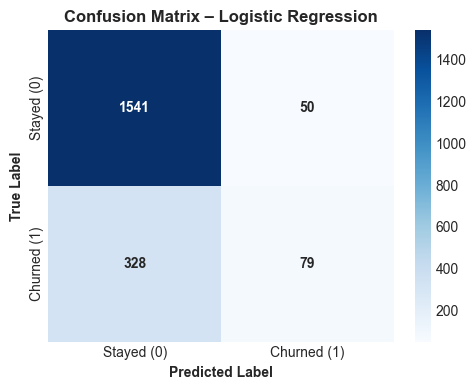


Plotting Confusion Matrix for: Decision Tree


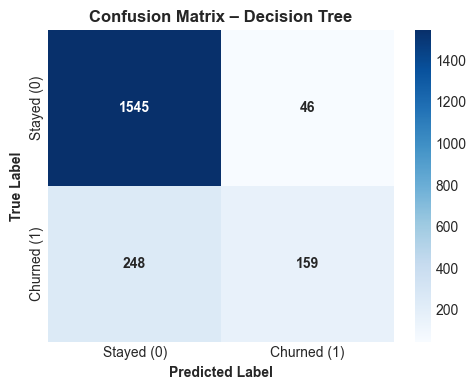


Plotting Confusion Matrix for: Random Forest


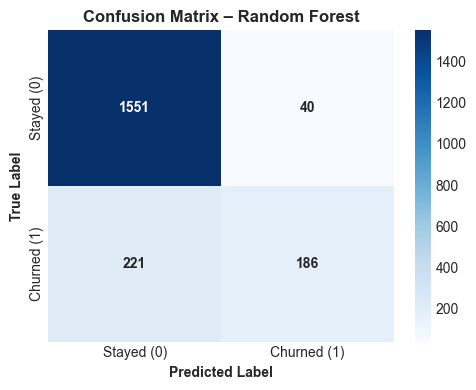

In [66]:
# CONFUSION MATRIX VISUALIZATION (ALL MODELS)

def plot_cm_visual(cm, model_name):
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                annot_kws={'fontweight': 'bold'},
                xticklabels=["Stayed (0)", "Churned (1)"],
                yticklabels=["Stayed (0)", "Churned (1)"])
    plt.title(f"Confusion Matrix – {model_name}",fontweight='bold')
    plt.xlabel("Predicted Label",fontweight='bold')
    plt.ylabel("True Label",fontweight='bold')
    plt.tight_layout()
    plt.show()


print("\n" + "="*70)
print("CONFUSION MATRIX VISUALIZATION")
print("="*70)

for model_name in models.keys():
    print(f"\nPlotting Confusion Matrix for: {model_name}")
    cm = confusion_matrix(y_test, predictions[model_name])
    plot_cm_visual(cm, model_name)


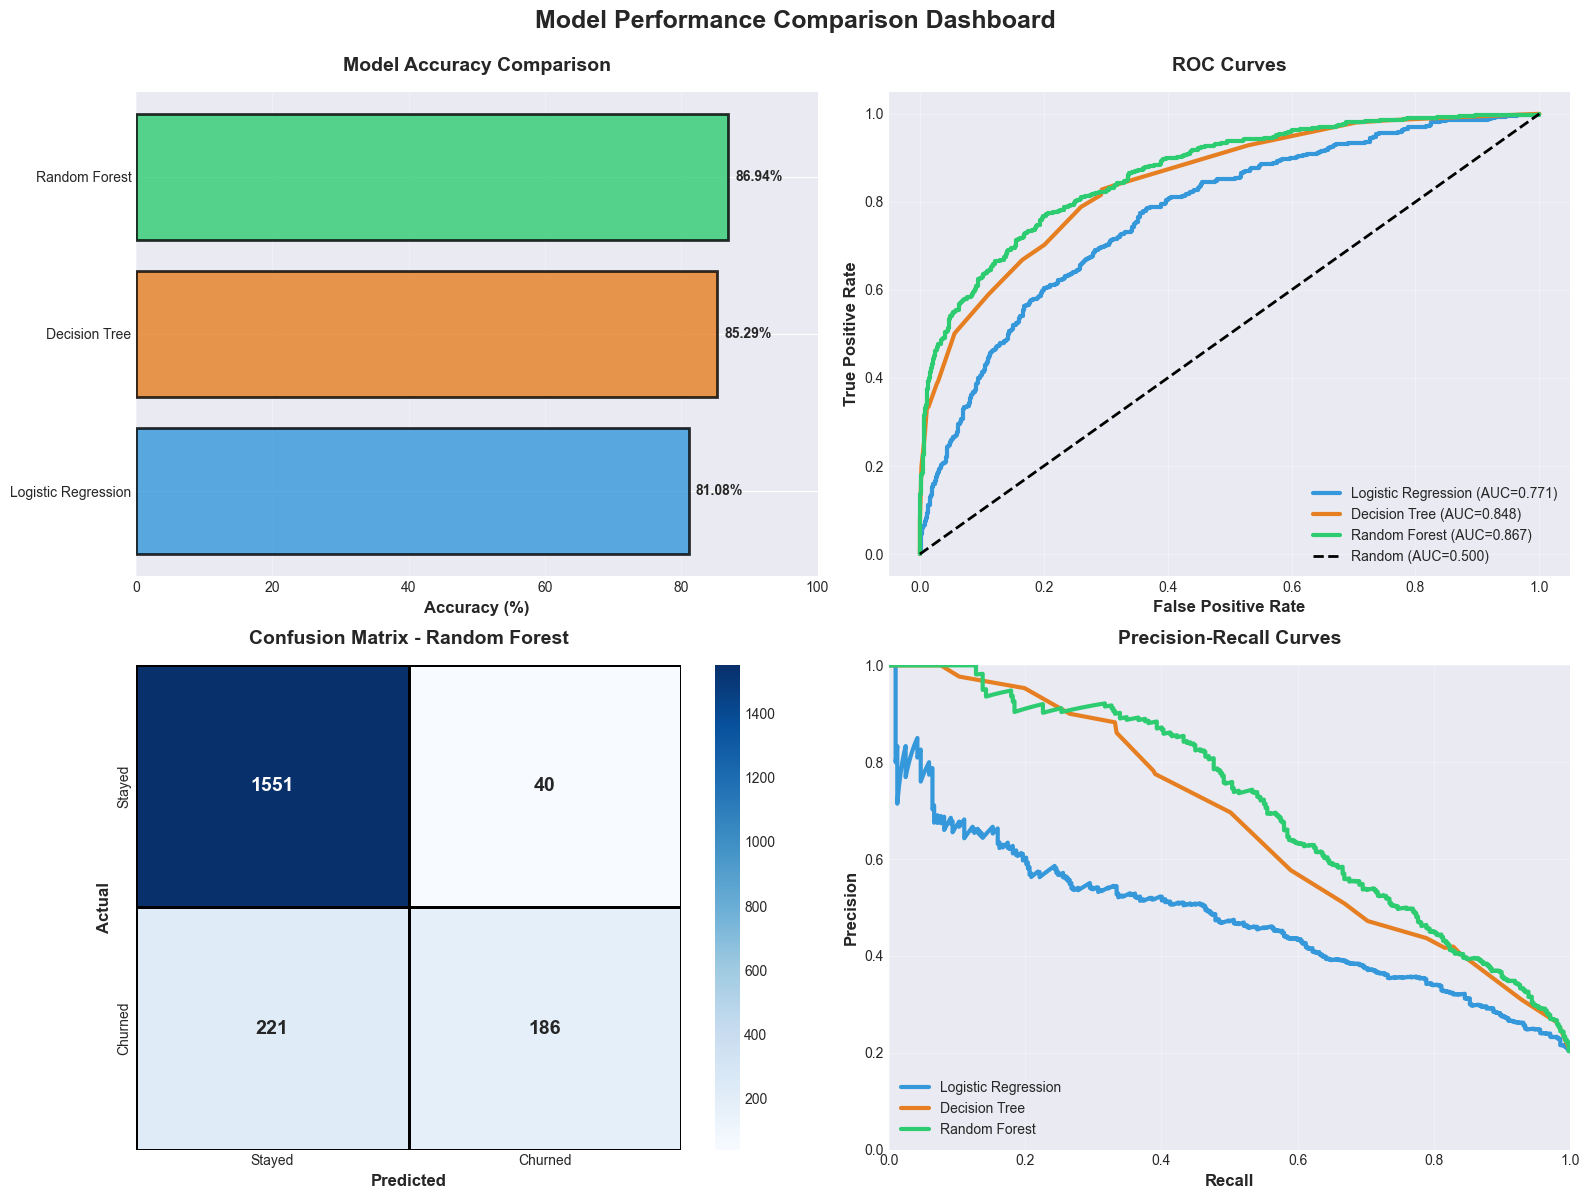

In [43]:
# Style 6: Professional Comparison Dashboard
plt.style.use('seaborn-v0_8-darkgrid')

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Performance Comparison Dashboard', 
             fontsize=18, fontweight='bold', y=0.995)

# 1. Accuracy Comparison
model_names = list(models.keys())
accuracies = [accuracy_score(y_test, predictions[m]) * 100 for m in model_names]
colors_acc = ['#3498db', '#e67e22', '#2ecc71']

axes[0, 0].barh(model_names, accuracies, color=colors_acc, 
                edgecolor='black', linewidth=2, alpha=0.8)
axes[0, 0].set_xlabel('Accuracy (%)', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold', pad=15)
axes[0, 0].set_xlim([0, 100])
for i, v in enumerate(accuracies):
    axes[0, 0].text(v + 1, i, f'{v:.2f}%', va='center', fontweight='bold')
axes[0, 0].grid(axis='x', alpha=0.3)

# 2. ROC Curves
for model_name, color in zip(model_names, colors_acc):
    fpr, tpr, _ = roc_curve(y_test, probabilities[model_name])
    auc_score = roc_auc_score(y_test, probabilities[model_name])
    axes[0, 1].plot(fpr, tpr, color=color, lw=3, 
                    label=f'{model_name} (AUC={auc_score:.3f})')

axes[0, 1].plot([0, 1], [0, 1], 'k--', lw=2, label='Random (AUC=0.500)')
axes[0, 1].set_xlabel('False Positive Rate', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('True Positive Rate', fontsize=12, fontweight='bold')
axes[0, 1].set_title('ROC Curves', fontsize=14, fontweight='bold', pad=15)
axes[0, 1].legend(loc='lower right', fontsize=10)
axes[0, 1].grid(alpha=0.3)

# 3. Confusion Matrix for Best Model
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Stayed', 'Churned'],
            yticklabels=['Stayed', 'Churned'],
            ax=axes[1, 0], linewidths=2, linecolor='black',
            annot_kws={'fontsize': 14, 'fontweight': 'bold'})
axes[1, 0].set_title(f'Confusion Matrix - {best_model_name}', 
                     fontsize=14, fontweight='bold', pad=15)
axes[1, 0].set_ylabel('Actual', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Predicted', fontsize=12, fontweight='bold')

# 4. Precision-Recall Curve
for model_name, color in zip(model_names, colors_acc):
    precision, recall, _ = precision_recall_curve(y_test, probabilities[model_name])
    axes[1, 1].plot(recall, precision, color=color, lw=3, label=model_name)

axes[1, 1].set_xlabel('Recall', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Precision', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Precision-Recall Curves', fontsize=14, fontweight='bold', pad=15)
axes[1, 1].legend(loc='lower left', fontsize=10)
axes[1, 1].grid(alpha=0.3)
axes[1, 1].set_xlim([0, 1])
axes[1, 1].set_ylim([0, 1])

plt.tight_layout()
plt.savefig('6_model_comparison_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

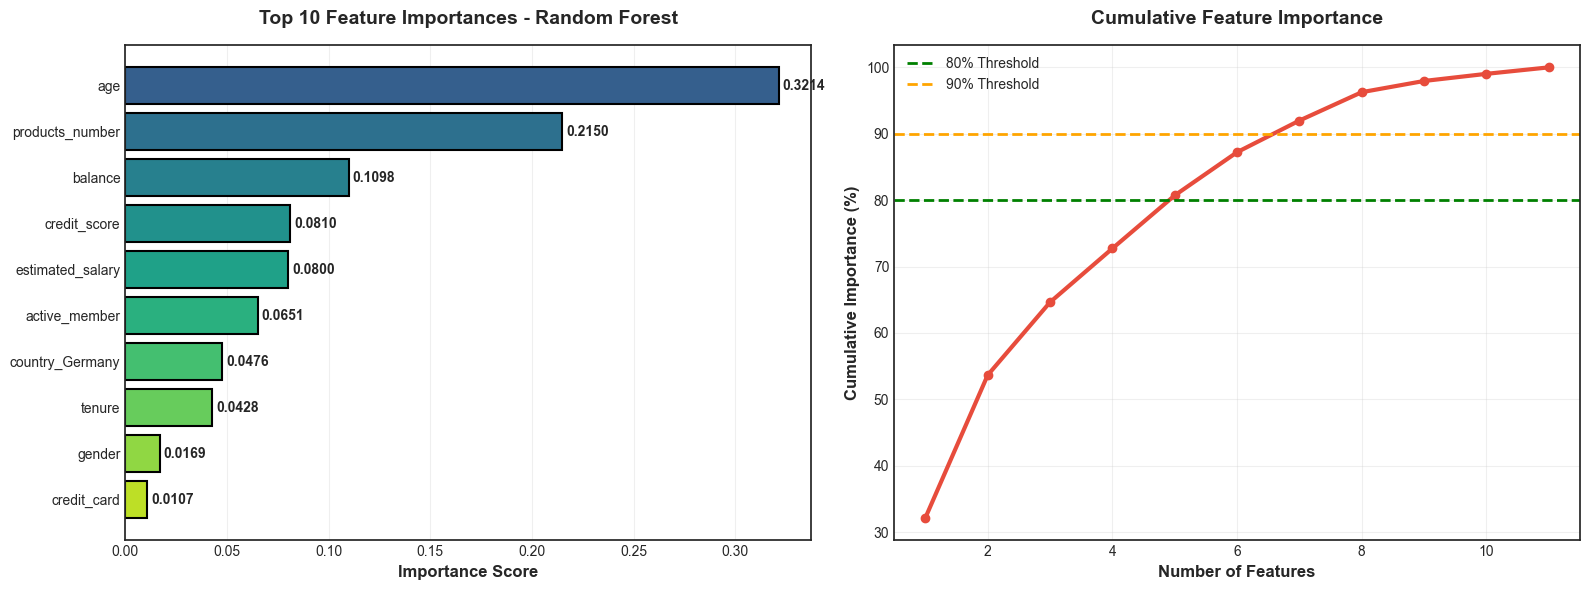


Top 5 Most Important Features:
   age: 0.3214
   products_number: 0.2150
   balance: 0.1098
   credit_score: 0.0810
   estimated_salary: 0.0800


In [44]:
# Style 7: Gradient Feature Importance
plt.style.use('seaborn-v0_8-white')

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Random Forest Feature Importance
rf_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Top 10 features
top10 = rf_importance.head(10)
colors_gradient = plt.cm.viridis(np.linspace(0.3, 0.9, len(top10)))

axes[0].barh(range(len(top10)), top10['importance'], 
             color=colors_gradient, edgecolor='black', linewidth=1.5)
axes[0].set_yticks(range(len(top10)))
axes[0].set_yticklabels(top10['feature'])
axes[0].set_xlabel('Importance Score', fontsize=12, fontweight='bold')
axes[0].set_title('Top 10 Feature Importances - Random Forest', 
                  fontsize=14, fontweight='bold', pad=15)
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(top10['importance']):
    axes[0].text(v + 0.002, i, f'{v:.4f}', va='center', fontweight='bold')

# Cumulative importance
rf_importance['cumulative'] = rf_importance['importance'].cumsum()
axes[1].plot(range(1, len(rf_importance)+1), 
             rf_importance['cumulative'].values * 100,
             color='#e74c3c', linewidth=3, marker='o', markersize=6)
axes[1].axhline(y=80, color='green', linestyle='--', linewidth=2, label='80% Threshold')
axes[1].axhline(y=90, color='orange', linestyle='--', linewidth=2, label='90% Threshold')
axes[1].set_xlabel('Number of Features', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Cumulative Importance (%)', fontsize=12, fontweight='bold')
axes[1].set_title('Cumulative Feature Importance', fontsize=14, fontweight='bold', pad=15)
axes[1].legend(fontsize=10)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('7_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nTop 5 Most Important Features:")
for idx, row in rf_importance.head(5).iterrows():
    print(f"   {row['feature']}: {row['importance']:.4f}")

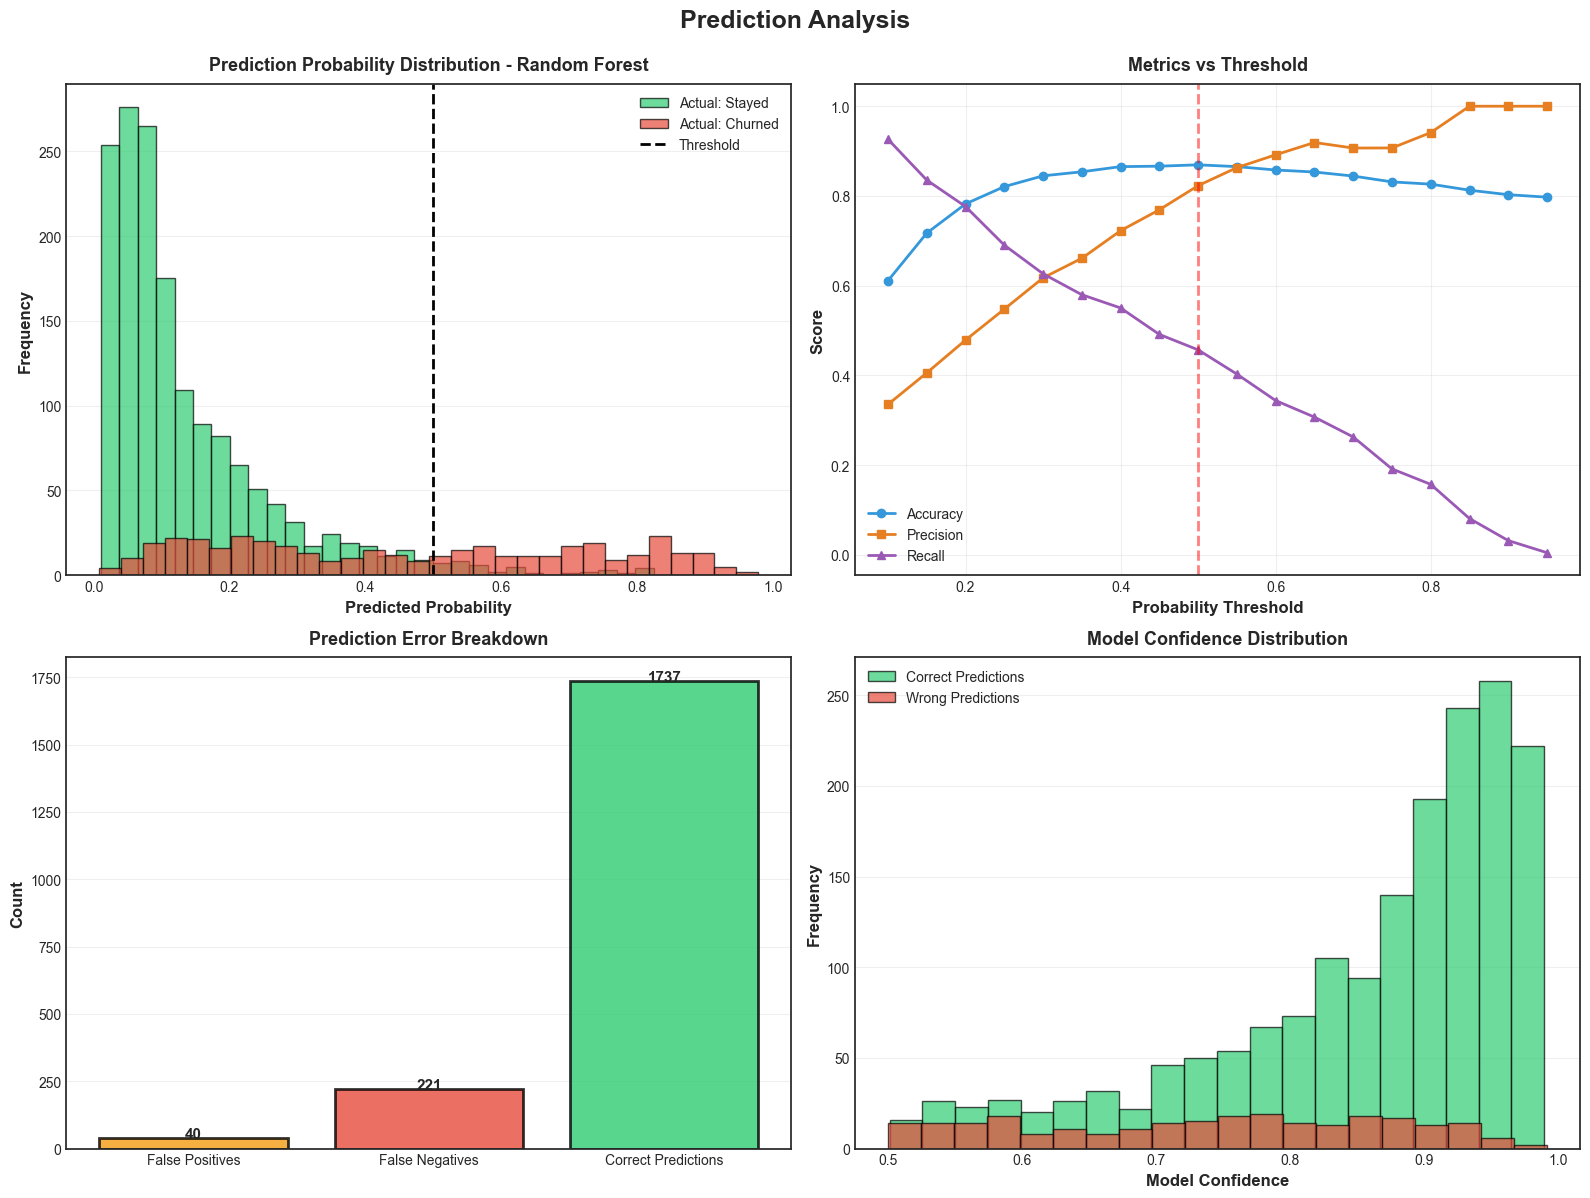


Error Analysis:
   False Positives: 40 (predicted churn but stayed)
   False Negatives: 221 (predicted stay but churned)
   Correct Predictions: 1737


In [45]:
# Style 8: Prediction Distribution
plt.style.use('seaborn-v0_8-pastel')

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Prediction Analysis', fontsize=18, fontweight='bold', y=0.995)

# 1. Prediction Distribution for Best Model
axes[0, 0].hist(probabilities[best_model_name][y_test==0], bins=30, 
                alpha=0.7, color='#2ecc71', label='Actual: Stayed', 
                edgecolor='black', linewidth=1)
axes[0, 0].hist(probabilities[best_model_name][y_test==1], bins=30, 
                alpha=0.7, color='#e74c3c', label='Actual: Churned',
                edgecolor='black', linewidth=1)
axes[0, 0].axvline(x=0.5, color='black', linestyle='--', linewidth=2, label='Threshold')
axes[0, 0].set_xlabel('Predicted Probability', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0, 0].set_title(f'Prediction Probability Distribution - {best_model_name}', 
                     fontsize=13, fontweight='bold', pad=10)
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Threshold Analysis
thresholds = np.arange(0.1, 1.0, 0.05)
accuracies_thresh = []
precisions_thresh = []
recalls_thresh = []

for thresh in thresholds:
    pred_thresh = (probabilities[best_model_name] >= thresh).astype(int)
    accuracies_thresh.append(accuracy_score(y_test, pred_thresh))
    
    # Calculate precision and recall
    cm_thresh = confusion_matrix(y_test, pred_thresh)
    if cm_thresh.shape == (2, 2):
        tn, fp, fn, tp = cm_thresh.ravel()
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        precisions_thresh.append(precision)
        recalls_thresh.append(recall)
    else:
        precisions_thresh.append(0)
        recalls_thresh.append(0)

axes[0, 1].plot(thresholds, accuracies_thresh, 'o-', color='#3498db', 
                linewidth=2, markersize=6, label='Accuracy')
axes[0, 1].plot(thresholds, precisions_thresh, 's-', color='#e67e22', 
                linewidth=2, markersize=6, label='Precision')
axes[0, 1].plot(thresholds, recalls_thresh, '^-', color='#9b59b6', 
                linewidth=2, markersize=6, label='Recall')
axes[0, 1].axvline(x=0.5, color='red', linestyle='--', linewidth=2, alpha=0.5)
axes[0, 1].set_xlabel('Probability Threshold', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Score', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Metrics vs Threshold', fontsize=13, fontweight='bold', pad=10)
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(alpha=0.3)

# 3. Error Analysis - False Positives vs False Negatives
fp_indices = np.where((best_pred == 1) & (y_test.values == 0))[0]
fn_indices = np.where((best_pred == 0) & (y_test.values == 1))[0]

error_data = pd.DataFrame({
    'Error Type': ['False Positives', 'False Negatives', 'Correct Predictions'],
    'Count': [len(fp_indices), len(fn_indices), 
              len(y_test) - len(fp_indices) - len(fn_indices)]
})

colors_error = ['#f39c12', '#e74c3c', '#2ecc71']
axes[1, 0].bar(error_data['Error Type'], error_data['Count'], 
               color=colors_error, edgecolor='black', linewidth=2, alpha=0.8)
axes[1, 0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Prediction Error Breakdown', fontsize=13, fontweight='bold', pad=10)
axes[1, 0].grid(axis='y', alpha=0.3)

for i, v in enumerate(error_data['Count']):
    axes[1, 0].text(i, v + 0.5, str(v), ha='center', fontweight='bold', fontsize=11)

# 4. Model Confidence Distribution
confidence = np.maximum(probabilities[best_model_name], 
                       1 - probabilities[best_model_name])
correct_mask = (best_pred == y_test.values)

axes[1, 1].hist(confidence[correct_mask], bins=20, alpha=0.7, 
                color='#2ecc71', label='Correct Predictions',
                edgecolor='black', linewidth=1)
axes[1, 1].hist(confidence[~correct_mask], bins=20, alpha=0.7, 
                color='#e74c3c', label='Wrong Predictions',
                edgecolor='black', linewidth=1)
axes[1, 1].set_xlabel('Model Confidence', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Model Confidence Distribution', fontsize=13, fontweight='bold', pad=10)
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('8_prediction_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nError Analysis:")
print(f"   False Positives: {len(fp_indices)} (predicted churn but stayed)")
print(f"   False Negatives: {len(fn_indices)} (predicted stay but churned)")
print(f"   Correct Predictions: {len(y_test) - len(fp_indices) - len(fn_indices)}")

---
## Section 9: Understanding the Results

### What Do These Metrics Mean?

**Confusion Matrix Interpretation:**
- **True Negatives (TN)**: Correctly predicted "Stayed"
- **False Positives (FP)**: Predicted "Churned" but actually stayed (Type I error)
- **False Negatives (FN)**: Predicted "Stayed" but actually churned (Type II error)
- **True Positives (TP)**: Correctly predicted "Churned"

**Which Error is Worse?**
- **False Negatives** are typically worse for banks - missing customers who will churn means losing revenue
- **False Positives** cost money for retention efforts but prevent revenue loss


BUSINESS IMPACT ANALYSIS

Business Metrics (Based on Test Set):

Revenue Impact:
   Customers correctly identified as churning: 186
   Potential customers saved (30% success): 55
   Revenue saved: $2,750,000
   Revenue lost (missed churners): $11,050,000

Cost Analysis:
   Retention campaigns sent: 226
   Total retention spending: $113,000

Net Business Impact:
   Net Benefit: $2,637,000
   ROI: 2333.6%


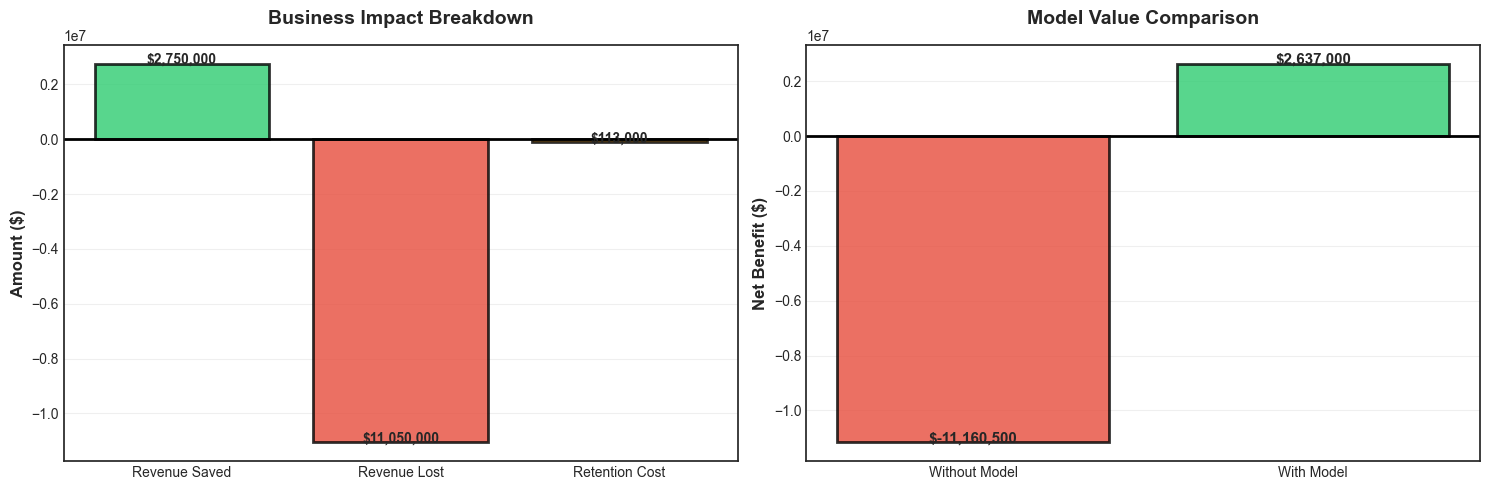

In [46]:
print("\n" + "=" * 70)
print("BUSINESS IMPACT ANALYSIS")
print("=" * 70)

# Assumptions for business impact
avg_customer_value = 50000  # Average account balance
retention_cost = 500        # Cost to retain one customer
retention_success_rate = 0.3  # 30% of retention efforts succeed

# Calculate business metrics
tn, fp, fn, tp = cm.ravel()

# Costs and Savings
saved_customers = int(tp * retention_success_rate)
retention_spending = (tp + fp) * retention_cost
revenue_saved = saved_customers * avg_customer_value
lost_revenue = fn * avg_customer_value
net_benefit = revenue_saved - retention_spending

print(f"\nBusiness Metrics (Based on Test Set):")
print(f"\nRevenue Impact:")
print(f"   Customers correctly identified as churning: {tp}")
print(f"   Potential customers saved (30% success): {saved_customers}")
print(f"   Revenue saved: ${revenue_saved:,.0f}")
print(f"   Revenue lost (missed churners): ${lost_revenue:,.0f}")

print(f"\nCost Analysis:")
print(f"   Retention campaigns sent: {tp + fp}")
print(f"   Total retention spending: ${retention_spending:,.0f}")

print(f"\nNet Business Impact:")
print(f"   Net Benefit: ${net_benefit:,.0f}")
print(f"   ROI: {(net_benefit/retention_spending)*100:.1f}%")

# Visualize business impact
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Impact breakdown
impact_categories = ['Revenue Saved', 'Revenue Lost', 'Retention Cost']
impact_values = [revenue_saved, -lost_revenue, -retention_spending]
impact_colors = ['#2ecc71', '#e74c3c', '#f39c12']

axes[0].bar(impact_categories, impact_values, color=impact_colors, 
            edgecolor='black', linewidth=2, alpha=0.8)
axes[0].axhline(y=0, color='black', linewidth=2)
axes[0].set_ylabel('Amount ($)', fontsize=12, fontweight='bold')
axes[0].set_title('Business Impact Breakdown', fontsize=14, fontweight='bold', pad=15)
axes[0].grid(axis='y', alpha=0.3)

for i, v in enumerate(impact_values):
    axes[0].text(i, v + (1000 if v > 0 else -5000), f'${abs(v):,.0f}', 
                ha='center', fontweight='bold', fontsize=10)

# Net benefit visualization
categories = ['Without Model', 'With Model']
without_model = -lost_revenue - fn * retention_cost  # Lose all churners
with_model = net_benefit

axes[1].bar(categories, [without_model, with_model], 
            color=['#e74c3c', '#2ecc71'], edgecolor='black', linewidth=2, alpha=0.8)
axes[1].axhline(y=0, color='black', linewidth=2)
axes[1].set_ylabel('Net Benefit ($)', fontsize=12, fontweight='bold')
axes[1].set_title('Model Value Comparison', fontsize=14, fontweight='bold', pad=15)
axes[1].grid(axis='y', alpha=0.3)

for i, v in enumerate([without_model, with_model]):
    axes[1].text(i, v + (2000 if v > 0 else -8000), f'${v:,.0f}', 
                ha='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.savefig('9_business_impact.png', dpi=300, bbox_inches='tight')
plt.show()